### MNIST Dataset

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
train_dataset = datasets.MNIST(root='/content/drive/MyDrive/CSBU014.N11.KHBC/Logistic_Regression/datasets',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

In [3]:
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/CSBU014.N11.KHBC/Logistic_Regression/datasets',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [4]:
train_dataset[2]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
import matplotlib.pyplot as plt

5

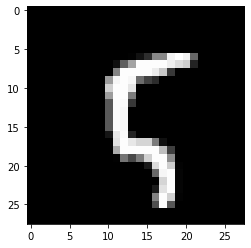

In [6]:
plt.imshow(train_dataset[100][0].squeeze(), cmap='gray')
train_dataset[100][1]

In [7]:
import random
import numpy as np

In [8]:
seed = 2411

In [9]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [10]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset)

### Logistic Regression

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
# Implement "Logistic Regression" model with PyTorch

class LogisticRegression(nn.Module):
    # input_dim -> the number of independent variables (attributes)
    # output_dim -> the number of (unique) classes for classification (e.g., dog-cat -> 2; car-bicycle-plane -> 3)
    def __init__(self, input_dim, output_dim):  
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        logits = self.linear(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [13]:
import torch.optim as optim

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [15]:
# Design the 'train_model' function for training models
# Loss Function: Cross Entropy Loss
# Optimizer: SGD

def train_model(data_loader, model, init_lr, maxEpoch):
    # Loss Function
    criterion = nn.CrossEntropyLoss()

    # Optimization Algorithm.
    # We can use other optimizers such as ADAM, RMSprop, etc.
    optimizer = optim.SGD(model.parameters(), lr=init_lr)
    
    loss_each_epoch = []  # For tracking the trend of loss value
    
    # Switch model to the training mode
    model.train()

    for epoch in range(maxEpoch):
        sum_loss = 0.0
        for (imgs, labels) in data_loader:
            # Load data to GPU/CPU
            imgs, labels = imgs.to(device), labels.to(device)

            # Change to the correct tensor shape
            # Our data currently is in the format (batch_size, color_channel, w, h) (64, 1, 28, 28)
            # We need to change our data to (batch_size, color_channel * w * h) (64, 1 * 28 * 28)
            imgs = imgs.reshape(imgs.shape[0], -1)

            # forward pass
            logits, _ = model(imgs)  # Feed the training data into the model
            loss = criterion(logits, labels)  # Calculate the loss value

            # backward pass
            optimizer.zero_grad()  # Empty the optimizer
            loss.backward()  # Compute the gradient dJ/dw's

            optimizer.step()  # Update the model's parameters

            sum_loss += loss.item()
        loss_each_epoch.append(sum_loss/len(data_loader.dataset))
        print(f'Epoch {epoch + 1}/{maxEpoch}, Loss: {loss_each_epoch[-1]:.2f}')
    return loss_each_epoch

In [16]:
# Train Logistic Regression model

clf_LR = LogisticRegression(input_dim=28 * 28, output_dim=10).to(device)
loss_each_epoch_LR = train_model(data_loader=train_loader, model=clf_LR, init_lr=0.001, maxEpoch=20)

Epoch 1/20, Loss: 0.03
Epoch 2/20, Loss: 0.02
Epoch 3/20, Loss: 0.02
Epoch 4/20, Loss: 0.02
Epoch 5/20, Loss: 0.01
Epoch 6/20, Loss: 0.01
Epoch 7/20, Loss: 0.01
Epoch 8/20, Loss: 0.01
Epoch 9/20, Loss: 0.01
Epoch 10/20, Loss: 0.01
Epoch 11/20, Loss: 0.01
Epoch 12/20, Loss: 0.01
Epoch 13/20, Loss: 0.01
Epoch 14/20, Loss: 0.01
Epoch 15/20, Loss: 0.01
Epoch 16/20, Loss: 0.01
Epoch 17/20, Loss: 0.01
Epoch 18/20, Loss: 0.01
Epoch 19/20, Loss: 0.01
Epoch 20/20, Loss: 0.01


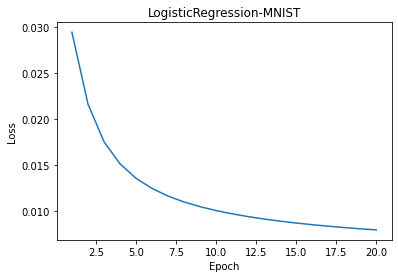

In [17]:
plt.plot(range(1, len(loss_each_epoch_LR) + 1), loss_each_epoch_LR)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LogisticRegression-MNIST')
plt.show()

In [18]:
loss_each_epoch_LR[-1]

0.007902178244789441

In [19]:
# Design the 'model_evaluation' function for evaluating the trained models
def model_evaluation(data_loader, model):
    nCorrects = 0
    model.eval()  # put our model on the evaluation mode

    with torch.no_grad():
        for (imgs, labels) in data_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            imgs = imgs.reshape(imgs.shape[0], -1)

            # forward
            _, probs = model(imgs)
            _, y_pred = probs.max(1)
            nCorrects += (y_pred == labels).sum()
    print(f'We got {nCorrects.item()}/{len(data_loader.dataset)} correct. Accuracy = {nCorrects.item()/len(data_loader.dataset) * 100:.2f}%')

In [20]:
print('Logistic Regression (Train Accuracy)')
model_evaluation(data_loader=train_loader, model=clf_LR)

Logistic Regression (Train Accuracy)
We got 52431/60000 correct. Accuracy = 87.39%


In [21]:
print('Logistic Regression (Test Accuracy)')
model_evaluation(data_loader=test_loader, model=clf_LR)

Logistic Regression (Test Accuracy)
We got 8839/10000 correct. Accuracy = 88.39%


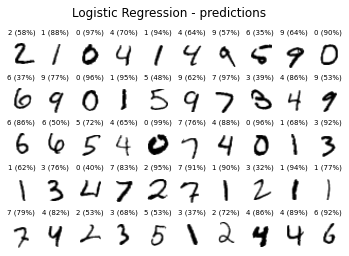

In [22]:
ROW_IMG, N_ROWS = 10, 5

fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(test_dataset.data[index], cmap='gray_r')
    
    with torch.no_grad():
        clf_LR.eval()
        X = test_dataset[index][0].reshape(test_dataset[index][0].shape[0], -1).to(device)
        _, probs = clf_LR(X)
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    
    plt.title(title, fontsize=7)
fig.suptitle('Logistic Regression - predictions')
plt.show()

In [23]:
# Task: Build a MLP model with 6 layers (input layer, ouput layer and 1 hidden layer)
# The activation of each node in 'input' layer and 'hidden' layers is ReLU
# The input size of each layer:
# + Input layer: input_dim
# + Hidden layer 1: 100
# + Output layer: 25

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.ReLU(),
            nn.Linear(100, 25),
            nn.ReLU(),
            nn.Linear(25, output_dim)
        )

    def forward(self, x):
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [24]:
clf_MLP = MLP(input_dim=28 * 28, output_dim=10).to(device)
clf_MLP

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=25, bias=True)
    (3): ReLU()
    (4): Linear(in_features=25, out_features=10, bias=True)
  )
)

In [25]:
# Train MLP model
# Input dim = 412 * 233
# Output dim = 32
# Initial Learning Rate: 0.001
# Max Epoch = 20
loss_each_epoch_MLP = train_model(train_loader, clf_MLP, 0.001, 20)

Epoch 1/20, Loss: 0.04
Epoch 2/20, Loss: 0.04
Epoch 3/20, Loss: 0.03
Epoch 4/20, Loss: 0.03
Epoch 5/20, Loss: 0.03
Epoch 6/20, Loss: 0.03
Epoch 7/20, Loss: 0.02
Epoch 8/20, Loss: 0.02
Epoch 9/20, Loss: 0.02
Epoch 10/20, Loss: 0.01
Epoch 11/20, Loss: 0.01
Epoch 12/20, Loss: 0.01
Epoch 13/20, Loss: 0.01
Epoch 14/20, Loss: 0.01
Epoch 15/20, Loss: 0.01
Epoch 16/20, Loss: 0.01
Epoch 17/20, Loss: 0.01
Epoch 18/20, Loss: 0.01
Epoch 19/20, Loss: 0.01
Epoch 20/20, Loss: 0.01


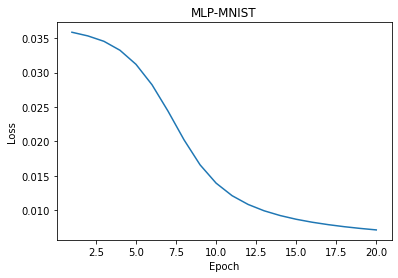

In [26]:
plt.plot(range(1, len(loss_each_epoch_MLP) + 1), loss_each_epoch_MLP)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP-MNIST')
plt.show()

In [27]:
print('Multi Layer Perceptron (Train Accuracy)')
model_evaluation(train_loader, clf_MLP)

Multi Layer Perceptron (Train Accuracy)
We got 52462/60000 correct. Accuracy = 87.44%


In [28]:
print('Multi Layer Perceptron (Test Accuracy)')
model_evaluation(test_loader, clf_MLP)

Multi Layer Perceptron (Test Accuracy)
We got 8793/10000 correct. Accuracy = 87.93%


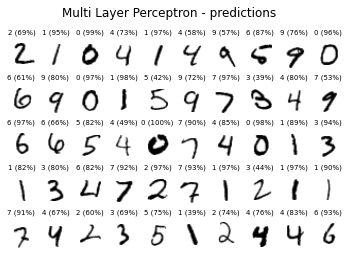

<Figure size 432x288 with 0 Axes>

In [29]:
ROW_IMG, N_ROWS = 10, 5

fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(test_dataset.data[index], cmap='gray_r')
    
    with torch.no_grad():
        clf_MLP.eval()
        X = test_dataset[index][0].reshape(test_dataset[index][0].shape[0], -1).to(device)
        _, probs = clf_MLP(X)
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    
    plt.title(title, fontsize=7)
fig.suptitle('Multi Layer Perceptron - predictions')
plt.show()
plt.savefig('MLP_pred.jpg', bbox_inches='tight', pad_inches=0.1, dpi=300)

### Cake Classification

In [40]:
import os
import cv2

In [41]:
root_dir = '/content/drive/MyDrive/CSBU014.N11.KHBC/Logistic_Regression/images'

In [42]:
list_folders = os.listdir(root_dir)
list_folders

['pizza', 'donut', 'banhmi', 'pretzel', 'cookie', 'croissaint']

In [43]:
X_cake, y_cake = [], []

In [44]:
for folder in list_folders:
    list_image_paths = os.listdir(root_dir + '/' + folder)
    for image_path in list_image_paths:
        img_matrix = cv2.imread(root_dir + '/' + folder + '/' + image_path, 0)
        X_cake.append([img_matrix])
        y_cake.append(folder)

In [45]:
# Normalize the value of each pixel by dividing them to 255
X_cake = np.array(X_cake)/255

In [46]:
# Perform 'label encoding' on y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
y_cake = le.fit_transform(y_cake)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_cake, y_cake, test_size=0.3, random_state=seed)

In [50]:
print(X_train.shape)

(210, 1, 500, 500)


In [51]:
# Convert the data type of X_train, X_test, y_train, y_test ('List') to 'Numpy'
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

In [52]:
# Convert the data type of X_train, X_test, y_train, y_test ('Numpy') to 'Tensor'
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [53]:
print(len(X_train))

210


In [54]:
from torch.utils.data import TensorDataset

In [55]:
# Create train_dataset, test_dataset
train_dataset_cake = TensorDataset(X_train, y_train)
test_dataset_cake = TensorDataset(X_test, y_test)

In [56]:
# Create train_loader, test_loader
train_loader_cake = DataLoader(train_dataset_cake, batch_size=16, shuffle=True)
test_loader_cake = DataLoader(test_dataset_cake)

In [57]:
print(train_dataset_cake[0])

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), tensor(0))


In [58]:
clf_LR_1 = LogisticRegression(input_dim=250000, output_dim=6).to(device)
loss_each_epoch_LR_1 = train_model(train_loader_cake, clf_LR_1, 0.001, 200)

Epoch 1/200, Loss: 4.94
Epoch 2/200, Loss: 5.42
Epoch 3/200, Loss: 4.85
Epoch 4/200, Loss: 3.74
Epoch 5/200, Loss: 2.33
Epoch 6/200, Loss: 2.31
Epoch 7/200, Loss: 1.57
Epoch 8/200, Loss: 2.81
Epoch 9/200, Loss: 1.09
Epoch 10/200, Loss: 0.23
Epoch 11/200, Loss: 0.34
Epoch 12/200, Loss: 0.27
Epoch 13/200, Loss: 0.81
Epoch 14/200, Loss: 1.23
Epoch 15/200, Loss: 0.46
Epoch 16/200, Loss: 0.71
Epoch 17/200, Loss: 0.61
Epoch 18/200, Loss: 0.95
Epoch 19/200, Loss: 0.12
Epoch 20/200, Loss: 1.02
Epoch 21/200, Loss: 0.43
Epoch 22/200, Loss: 0.10
Epoch 23/200, Loss: 0.10
Epoch 24/200, Loss: 0.18
Epoch 25/200, Loss: 0.60
Epoch 26/200, Loss: 0.62
Epoch 27/200, Loss: 0.05
Epoch 28/200, Loss: 0.49
Epoch 29/200, Loss: 0.19
Epoch 30/200, Loss: 0.37
Epoch 31/200, Loss: 0.04
Epoch 32/200, Loss: 0.09
Epoch 33/200, Loss: 0.05
Epoch 34/200, Loss: 0.10
Epoch 35/200, Loss: 0.02
Epoch 36/200, Loss: 0.05
Epoch 37/200, Loss: 0.04
Epoch 38/200, Loss: 0.07
Epoch 39/200, Loss: 0.02
Epoch 40/200, Loss: 0.36
Epoch 41/

In [59]:
clf_MLP_1 = MLP(input_dim=250000, output_dim=6).to(device)
loss_each_epoch_MLP_1 = train_model(train_loader_cake, clf_MLP_1, 0.001, 200)

Epoch 1/200, Loss: 0.12
Epoch 2/200, Loss: 0.12
Epoch 3/200, Loss: 0.12
Epoch 4/200, Loss: 0.12
Epoch 5/200, Loss: 0.12
Epoch 6/200, Loss: 0.11
Epoch 7/200, Loss: 0.11
Epoch 8/200, Loss: 0.11
Epoch 9/200, Loss: 0.11
Epoch 10/200, Loss: 0.11
Epoch 11/200, Loss: 0.11
Epoch 12/200, Loss: 0.11
Epoch 13/200, Loss: 0.11
Epoch 14/200, Loss: 0.11
Epoch 15/200, Loss: 0.11
Epoch 16/200, Loss: 0.10
Epoch 17/200, Loss: 0.10
Epoch 18/200, Loss: 0.10
Epoch 19/200, Loss: 0.10
Epoch 20/200, Loss: 0.10
Epoch 21/200, Loss: 0.10
Epoch 22/200, Loss: 0.10
Epoch 23/200, Loss: 0.09
Epoch 24/200, Loss: 0.09
Epoch 25/200, Loss: 0.09
Epoch 26/200, Loss: 0.09
Epoch 27/200, Loss: 0.09
Epoch 28/200, Loss: 0.09
Epoch 29/200, Loss: 0.08
Epoch 30/200, Loss: 0.08
Epoch 31/200, Loss: 0.08
Epoch 32/200, Loss: 0.08
Epoch 33/200, Loss: 0.08
Epoch 34/200, Loss: 0.07
Epoch 35/200, Loss: 0.07
Epoch 36/200, Loss: 0.07
Epoch 37/200, Loss: 0.07
Epoch 38/200, Loss: 0.07
Epoch 39/200, Loss: 0.06
Epoch 40/200, Loss: 0.06
Epoch 41/

In [60]:
print('Logistic Regression (Train Accuracy)')
model_evaluation(data_loader=train_loader_cake, model=clf_LR_1)

Logistic Regression (Train Accuracy)
We got 210/210 correct. Accuracy = 100.00%


In [61]:
print('Logistic Regression (Test Accuracy)')
model_evaluation(data_loader=test_loader_cake, model=clf_LR_1)

Logistic Regression (Test Accuracy)
We got 85/90 correct. Accuracy = 94.44%


In [62]:
print('Multi Layer Perceptron (Train Accuracy)')
model_evaluation(train_loader_cake, clf_MLP_1)

Multi Layer Perceptron (Train Accuracy)
We got 202/210 correct. Accuracy = 96.19%


In [63]:
print('Multi Layer Perceptron (Test Accuracy)')
model_evaluation(test_loader_cake, clf_MLP_1)

Multi Layer Perceptron (Test Accuracy)
We got 82/90 correct. Accuracy = 91.11%


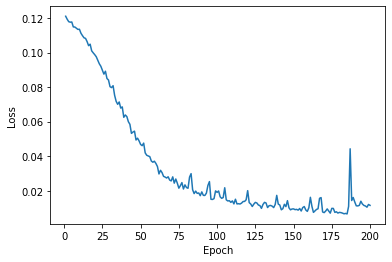

In [64]:
plt.plot(range(1, len(loss_each_epoch_MLP_1) + 1), loss_each_epoch_MLP_1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()